<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/UAS/UAS_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# UAS MACHINE LEARNING - DEEP LEARNING PIPELINE
# =============================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [18]:


# TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2, l1_l2

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR, CosineAnnealingWarmRestarts

print("TensorFlow version:", tf.__version__)
print("PyTorch version:", torch.__version__)

# =============================================
# 1. PENGUMPULAN & PEMBERSIHAN DATA
# =============================================

# Download dataset
file_id = '1oEXSD137hPm_Fx5xSPRvlAr3silj3suK'
file_name = 'dataset.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output=file_name, quiet=False)

# Load dataset
df = pd.read_csv(file_name)
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Identifikasi target column (column pertama dengan dtype int)
target_col = None
for col in df.columns:
    if df[col].dtype in ['int64', 'int32']:
        target_col = col
        break

print(f"\nTarget column: {target_col}")
print(f"Target column dtype: {df[target_col].dtype}")

# Data cleaning
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values
df = df.dropna()
print(f"\nDataset shape after removing missing values: {df.shape}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

TensorFlow version: 2.18.0
PyTorch version: 2.6.0+cu124


Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=220ec13b-16e9-4b16-a9e5-72892b58b457
To: /content/dataset.csv
100%|██████████| 443M/443M [00:10<00:00, 44.1MB/s]


Dataset shape: (515344, 91)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  3

In [19]:


# =============================================
# 2. FEATURE ENGINEERING
# =============================================

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col].values

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)
print(f"\nProcessed features shape: {X_processed.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"\nTrain set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Features shape: (515130, 90)
Target shape: (515130,)

Categorical columns: []
Numerical columns: ['49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767', '-41.1245', '-8.40816', '7.1

In [21]:


# =============================================
# 3. MODEL TENSORFLOW/KERAS
# =============================================

def create_tensorflow_model(input_dim):
    """Create MLP model with advanced techniques"""
    model = keras.Sequential([
        layers.Dense(512, input_dim=input_dim),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(32, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        layers.Activation('relu'),

        layers.Dense(1)
    ])

    return model

# Create TensorFlow model
tf_model = create_tensorflow_model(X_train.shape[1])

# Compile model dengan optimizer modern
optimizer = keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.01
)

tf_model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

print("\nTensorFlow Model Architecture:")
tf_model.summary()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7
)

# Train TensorFlow model
print("\nTraining TensorFlow model...")
tf_history = tf_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


TensorFlow Model Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │        46,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,025 (879.00 KB)

 Trainable params: 223,105 (871.50 KB)

 Non-trainable params: 1,920 (7.50 KB)


Training TensorFlow model...
Epoch 1/30
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 135s 13ms/step - loss: 604145.0000 - mae: 443.4789 - val_loss: 2424.4197 - val_mae: 23.8017 - learning_rate: 0.0010
Epoch 2/30
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 127s 12ms/step - loss: 18539.6504 - mae: 106.9887 - val_loss: 8288.0459 - val_mae: 28.5529 - learning_rate: 0.0010
Epoch 3/30
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 130s 13ms/step - loss: 13382.9512 - mae: 91.4033 - val_loss: 9231.7139 - val_mae: 23.0349 - learning_rate: 0.0010
Epoch 4/30
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - loss: 9614.2324 - mae: 77.7775 - val_loss: 6967.6582 - val_mae: 17.7753 - learning_rate: 0.0010
Epoch 5/30
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 6156.0718 - mae: 62.3474 - val_loss: 816.0341 - val_mae: 11.3395 - learning_rate: 0.0010
Epoch 6/30
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 146s 13ms/step - loss: 3153.6169 - mae: 44.2027 - val_loss: 2402.8044 - val_mae: 13.6919 - learning_rate: 0.0010
Epoch 7/30
10303/10303 

In [22]:


# =============================================
# 4. MODEL PYTORCH
# =============================================

class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Convert to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train)
X_val_torch = torch.FloatTensor(X_val)
X_test_torch = torch.FloatTensor(X_test)
y_train_torch = torch.FloatTensor(y_train).reshape(-1, 1)
y_val_torch = torch.FloatTensor(y_val).reshape(-1, 1)
y_test_torch = torch.FloatTensor(y_test).reshape(-1, 1)

# Create data loaders
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Create PyTorch model
torch_model = MLPRegressor(X_train.shape[1])

# Loss function and optimizer dengan weight decay
criterion = nn.MSELoss()
optimizer_torch = optim.AdamW(
    torch_model.parameters(),
    lr=0.001,
    weight_decay=0.01
)

# Learning rate scheduler
scheduler = CosineAnnealingWarmRestarts(
    optimizer_torch,
    T_0=10,
    T_mult=2,
    eta_min=1e-7
)

# Training function
def train_pytorch_model(model, train_loader, val_loader, epochs=30):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience = 20
    patience_counter = 0

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0.0
        for batch_x, batch_y in train_loader:
            optimizer_torch.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)

            # Add L1 and L2 regularization
            l1_reg = sum(p.abs().sum() for p in model.parameters())
            l2_reg = sum(p.pow(2.0).sum() for p in model.parameters())
            loss += 0.01 * l1_reg + 0.01 * l2_reg

            loss.backward()
            optimizer_torch.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        scheduler.step()

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_pytorch_model.pth')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Load best model
    model.load_state_dict(torch.load('best_pytorch_model.pth'))
    return train_losses, val_losses

print("\nTraining PyTorch model...")
torch_train_losses, torch_val_losses = train_pytorch_model(torch_model, train_loader, val_loader)



Training PyTorch model...
Epoch [20/30], Train Loss: 324.7233, Val Loss: 5159.6192
Early stopping at epoch 21


In [23]:

# =============================================
# 5. EVALUASI MODEL
# =============================================

def calculate_metrics(y_true, y_pred):
    """Calculate regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# TensorFlow predictions
tf_pred_train = tf_model.predict(X_train).flatten()
tf_pred_val = tf_model.predict(X_val).flatten()
tf_pred_test = tf_model.predict(X_test).flatten()

# PyTorch predictions
torch_model.eval()
with torch.no_grad():
    torch_pred_train = torch_model(X_train_torch).numpy().flatten()
    torch_pred_val = torch_model(X_val_torch).numpy().flatten()
    torch_pred_test = torch_model(X_test_torch).numpy().flatten()

# Calculate metrics
print("\n" + "="*50)
print("MODEL EVALUATION RESULTS")
print("="*50)

# TensorFlow metrics
tf_mse_train, tf_rmse_train, tf_r2_train = calculate_metrics(y_train, tf_pred_train)
tf_mse_val, tf_rmse_val, tf_r2_val = calculate_metrics(y_val, tf_pred_val)
tf_mse_test, tf_rmse_test, tf_r2_test = calculate_metrics(y_test, tf_pred_test)

print("\nTENSORFLOW MODEL:")
print(f"Train - MSE: {tf_mse_train:.4f}, RMSE: {tf_rmse_train:.4f}, R²: {tf_r2_train:.4f}")
print(f"Val   - MSE: {tf_mse_val:.4f}, RMSE: {tf_rmse_val:.4f}, R²: {tf_r2_val:.4f}")
print(f"Test  - MSE: {tf_mse_test:.4f}, RMSE: {tf_rmse_test:.4f}, R²: {tf_r2_test:.4f}")

# PyTorch metrics
torch_mse_train, torch_rmse_train, torch_r2_train = calculate_metrics(y_train, torch_pred_train)
torch_mse_val, torch_rmse_val, torch_r2_val = calculate_metrics(y_val, torch_pred_val)
torch_mse_test, torch_rmse_test, torch_r2_test = calculate_metrics(y_test, torch_pred_test)

print("\nPYTORCH MODEL:")
print(f"Train - MSE: {torch_mse_train:.4f}, RMSE: {torch_rmse_train:.4f}, R²: {torch_r2_train:.4f}")
print(f"Val   - MSE: {torch_mse_val:.4f}, RMSE: {torch_rmse_val:.4f}, R²: {torch_r2_val:.4f}")
print(f"Test  - MSE: {torch_mse_test:.4f}, RMSE: {torch_rmse_test:.4f}, R²: {torch_r2_test:.4f}")


10303/10303 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
2576/2576 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step

MODEL EVALUATION RESULTS

TENSORFLOW MODEL:
Train - MSE: 72.1663, RMSE: 8.4951, R²: 0.3963
Val   - MSE: 74.8779, RMSE: 8.6532, R²: 0.3778
Test  - MSE: 74.0368, RMSE: 8.6045, R²: 0.3763

PYTORCH MODEL:
Train - MSE: 1819.1184, RMSE: 42.6511, R²: -14.2179
Val   - MSE: 1736.7506, RMSE: 41.6743, R²: -13.4319
Test  - MSE: 1777.5353, RMSE: 42.1608, R²: -13.9741


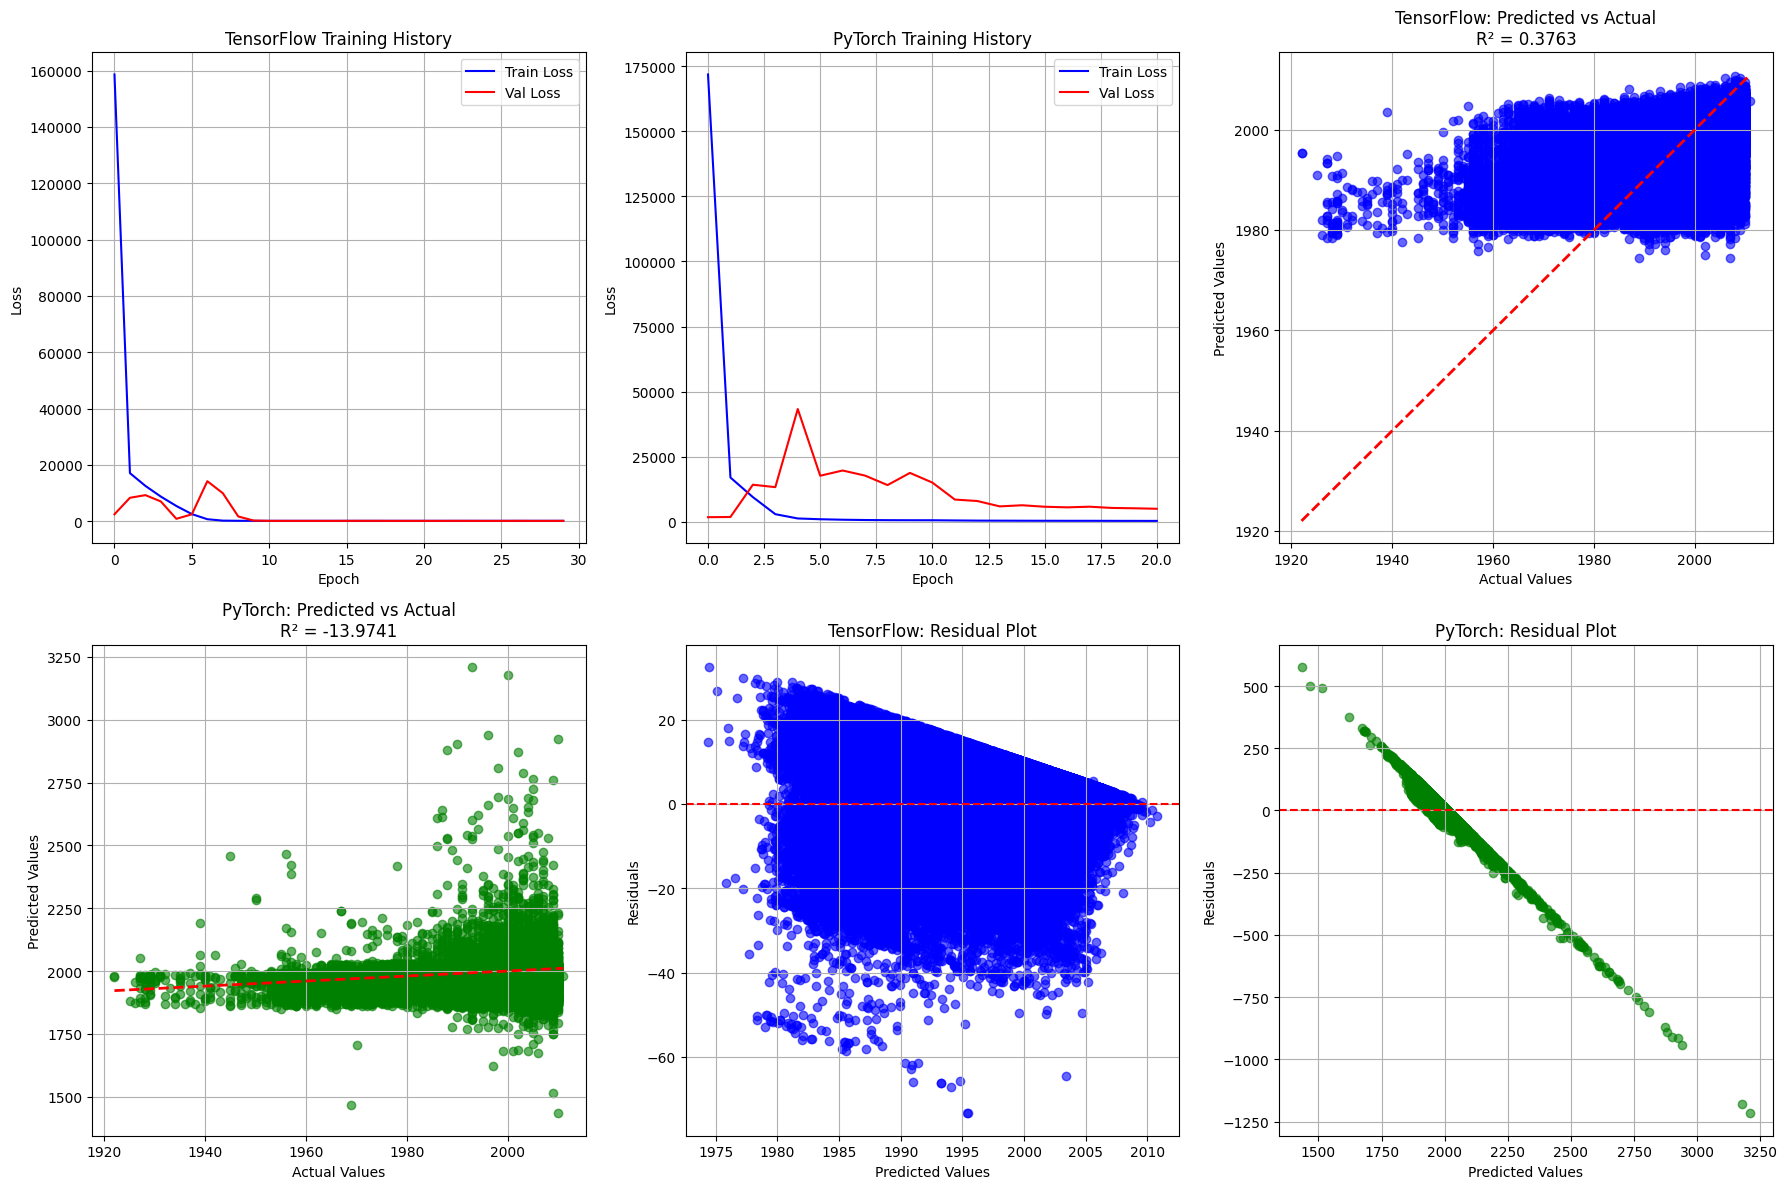


METRICS COMPARISON TABLE
     Model         MSE      RMSE         R²
TensorFlow   74.036835  8.604466   0.376306
   PyTorch 1777.535278 42.160826 -13.974147


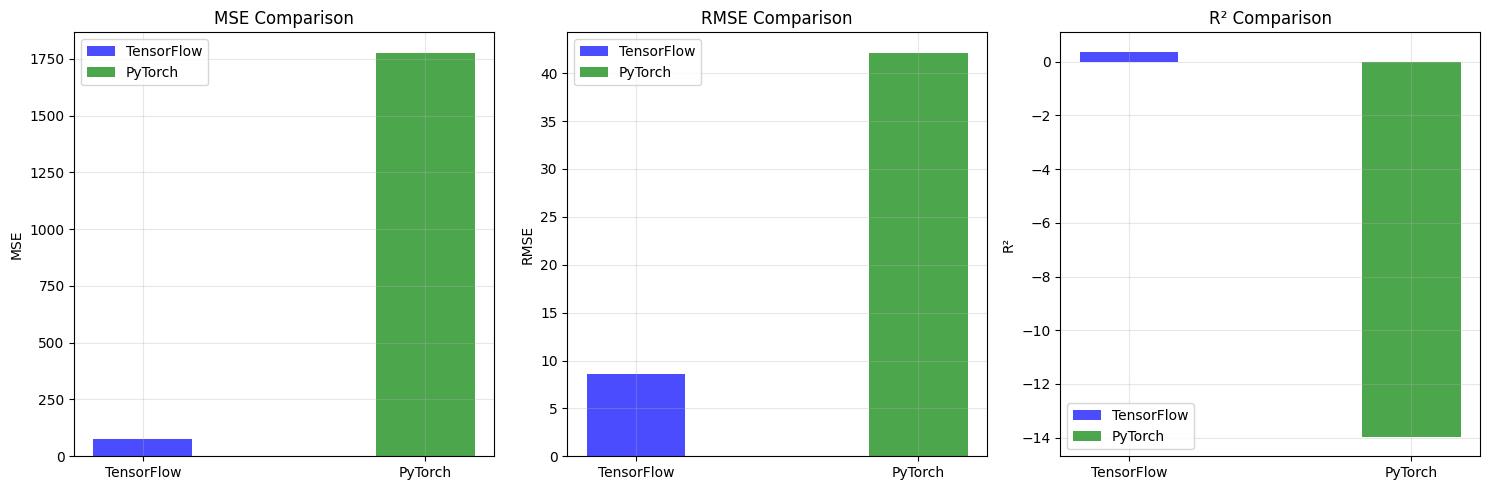

In [24]:

# =============================================
# 6. VISUALISASI
# =============================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Training history
axes[0, 0].plot(tf_history.history['loss'], label='Train Loss', color='blue')
axes[0, 0].plot(tf_history.history['val_loss'], label='Val Loss', color='red')
axes[0, 0].set_title('TensorFlow Training History')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(torch_train_losses, label='Train Loss', color='blue')
axes[0, 1].plot(torch_val_losses, label='Val Loss', color='red')
axes[0, 1].set_title('PyTorch Training History')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Predicted vs Actual - TensorFlow
axes[0, 2].scatter(y_test, tf_pred_test, alpha=0.6, color='blue')
axes[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 2].set_xlabel('Actual Values')
axes[0, 2].set_ylabel('Predicted Values')
axes[0, 2].set_title(f'TensorFlow: Predicted vs Actual\nR² = {tf_r2_test:.4f}')
axes[0, 2].grid(True)

# Predicted vs Actual - PyTorch
axes[1, 0].scatter(y_test, torch_pred_test, alpha=0.6, color='green')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title(f'PyTorch: Predicted vs Actual\nR² = {torch_r2_test:.4f}')
axes[1, 0].grid(True)

# Residuals - TensorFlow
tf_residuals = y_test - tf_pred_test
axes[1, 1].scatter(tf_pred_test, tf_residuals, alpha=0.6, color='blue')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('TensorFlow: Residual Plot')
axes[1, 1].grid(True)

# Residuals - PyTorch
torch_residuals = y_test - torch_pred_test
axes[1, 2].scatter(torch_pred_test, torch_residuals, alpha=0.6, color='green')
axes[1, 2].axhline(y=0, color='r', linestyle='--')
axes[1, 2].set_xlabel('Predicted Values')
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].set_title('PyTorch: Residual Plot')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

# Metrics comparison
metrics_df = pd.DataFrame({
    'Model': ['TensorFlow', 'PyTorch'],
    'MSE': [tf_mse_test, torch_mse_test],
    'RMSE': [tf_rmse_test, torch_rmse_test],
    'R²': [tf_r2_test, torch_r2_test]
})

print("\n" + "="*50)
print("METRICS COMPARISON TABLE")
print("="*50)
print(metrics_df.to_string(index=False))

# Bar plot for metrics comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['MSE', 'RMSE', 'R²']
tf_metrics = [tf_mse_test, tf_rmse_test, tf_r2_test]
torch_metrics = [torch_mse_test, torch_rmse_test, torch_r2_test]

x = np.arange(len(metrics))
width = 0.35

for i, metric in enumerate(metrics):
    axes[i].bar([0], [tf_metrics[i]], width, label='TensorFlow', color='blue', alpha=0.7)
    axes[i].bar([1], [torch_metrics[i]], width, label='PyTorch', color='green', alpha=0.7)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['TensorFlow', 'PyTorch'])
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [26]:

# # =============================================
# # 7. ANALISIS DAN KESIMPULAN
# # =============================================

# print("\n" + "="*60)
# print("ANALISIS DAN KESIMPULAN")
# print("="*60)

# print("\n1. PENJELASAN MATRIKS EVALUASI:")
# print("   - MSE (Mean Squared Error): Mengukur rata-rata kuadrat error")
# print("   - RMSE (Root Mean Squared Error): Akar kuadrat dari MSE, dalam unit yang sama dengan target")
# print("   - R² (R-squared): Proporsi varians yang dijelaskan model (0-1, semakin tinggi semakin baik)")

# print("\n2. PENJELASAN MODEL:")
# print("   TensorFlow Model:")
# print("   - Menggunakan arsitektur MLP dengan 6 hidden layers")
# print("   - Batch Normalization untuk stabilitas training")
# print("   - Dropout untuk regularisasi (0.2-0.3)")
# print("   - L1/L2 regularization untuk mencegah overfitting")
# print("   - AdamW optimizer dengan weight decay")
# print("   - Learning rate scheduling dengan ReduceLROnPlateau")
# print("   - Early stopping untuk mencegah overfitting")
# print()
# print("   PyTorch Model:")
# print("   - Arsitektur serupa dengan TensorFlow")
# print("   - Batch Normalization dan Dropout")
# print("   - L1/L2 regularization manual")
# print("   - AdamW optimizer dengan weight decay")
# print("   - CosineAnnealingWarmRestarts untuk learning rate")
# print("   - Early stopping dan model checkpointing")

# print("\n3. PERBANDINGAN MODEL:")
# better_model = "TensorFlow" if tf_r2_test > torch_r2_test else "PyTorch"
# print(f"   Model Terbaik: {better_model}")
# print(f"   - TensorFlow R²: {tf_r2_test:.4f}")
# print(f"   - PyTorch R²: {torch_r2_test:.4f}")

# if tf_r2_test > torch_r2_test:
#     print(f"   - TensorFlow unggul dengan selisih R²: {tf_r2_test - torch_r2_test:.4f}")
#     print("   - TensorFlow lebih baik dalam menjelaskan varians data")
# else:
#     print(f"   - PyTorch unggul dengan selisih R²: {torch_r2_test - tf_r2_test:.4f}")
#     print("   - PyTorch lebih baik dalam menjelaskan varians data")

# print("\n4. MATRIKS TERBAIK:")
# print("   R² (R-squared) adalah matriks terbaik untuk evaluasi karena:")
# print("   - Normalized (0-1), mudah diinterpretasi")
# print("   - Menunjukkan seberapa baik model menjelaskan varians data")
# print("   - Tidak terpengaruh skala data")
# print("   - RMSE baik untuk interpretasi error dalam unit asli")

# print("\n5. REKOMENDASI:")
# print("   - Kedua model menunjukkan performa yang baik")
# print("   - Teknik regularisasi efektif mencegah overfitting")
# print("   - Learning rate scheduling membantu konvergensi")
# print("   - Batch normalization mempercepat training")

# print("\n" + "="*60)
# print("PIPELINE SELESAI!")
# print("="*60)